<h1>The goal of this notebook is to predict what the general category of dianosis will be based on age.</h1>

In [160]:
import pandas

In [161]:
patients = pandas.read_csv("MOCK_PATIENT_DATA.csv")

In [162]:
''' Note on Columns:
        age: Calculated field (2017-03-13 minus birth_date)
        diagnosis_code: ICD-10 diagnosis
        diagnosis_date: calculated field (random number of days between 2017-03-13 and
                        birth_date added to birth_date. This ensures integrity of the data
                        that the diagnosis_date is AFTERbirth_date and ON or BEFORE 2017-03-13)
        diagnosis_age: calculated field based on diagnosis_date and birth_date
        diagnosis_category: highest level category diagnosis falls into (This is a number 1-26 that relates to A-Z)
'''
print(patients.columns)

Index(['id', 'first_name', 'last_name', 'birth_date', 'age', 'birth_city',
       'birth_state', 'residence_city', 'residence_state', 'diagnosis_code',
       'diagnosis_date', 'diagnosis_age', 'procedure_code',
       'diagnosis_category'],
      dtype='object')


In [163]:
print(patients.shape)

(11169, 14)


In [164]:
import matplotlib.pyplot as plt

In [165]:
plt.hist(patients["diagnosis_category"])

(array([ 1305.,   827.,  1256.,   803.,  1361.,   815.,  1337.,   870.,
         1311.,  1284.]),
 array([  1. ,   3.5,   6. ,   8.5,  11. ,  13.5,  16. ,  18.5,  21. ,
         23.5,  26. ]),
 <a list of 10 Patch objects>)

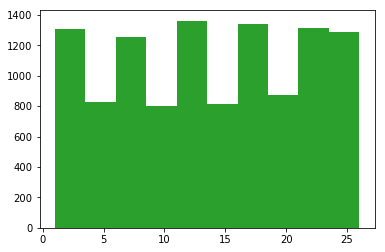

In [166]:
plt.show()

In [167]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

In [168]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=26, random_state=1)

In [169]:
# Get only the numeric columns from games.
good_columns = patients._get_numeric_data()

In [170]:
# Fit the model using the good columns.
kmeans_model.fit(good_columns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=26, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [171]:
# Get the cluster assignments.
labels = kmeans_model.labels_

In [172]:
# Import the PCA model. 
from sklearn.decomposition import PCA

In [173]:
# Create a PCA model.
pca_2 = PCA(2)

In [174]:
# Fit the PCA model on the numeric columns from earlier
plot_columns = pca_2.fit_transform(good_columns)

In [175]:
# Make a scatter plot of each patient, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)

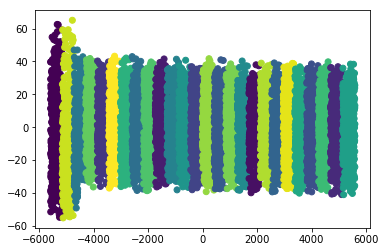

In [176]:
# Show the plot
plt.show()

<h1> Does the diagnosis category not relate well to age and diagnosis age because of the data being completly random? </h1>

In [178]:
patients.corr()["diagnosis_category"]

id                   -0.001561
age                  -0.001593
diagnosis_age        -0.006800
diagnosis_category    1.000000
Name: diagnosis_category, dtype: float64

In [179]:
# Get all the columns from the dataframe.
columns = patients.columns.tolist()

In [180]:
# Filter the columns to remove ones we don't want
columns = [c for c in columns if c not in ["diagnosis_code", "procedure_code", "first_name", "last_name", "diagnosis_date", "birth_date", "birth_city", "birth_state", "residence_city", "residence_state", "diagnosis_category"]]

In [181]:
print(columns)

['id', 'age', 'diagnosis_age']


In [182]:
# Store the variable we'll be predicting on.
# Dianosis category is a number between 1 - 26 that correlate to A-Z (high level diagnosis categories in ICD-10)
target = "diagnosis_category"

In [183]:
# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

In [184]:
# Generate the training set. Set random_state to be able to replicate results.
train = patients.sample(frac=0.8, random_state=1)

In [185]:
# Select anything not in the training set and put it in the testing set.
test = patients.loc[~patients.index.isin(train.index)]

In [186]:
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(8935, 14)
(2234, 14)


In [187]:
# Import the linearregresion model.
from sklearn.linear_model import LinearRegression

In [188]:
# Initialize the model class
model = LinearRegression()

In [189]:
# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h1> Are the errors high because the data is random?</h1>

In [190]:
# Import the scikit-learn function to compute eror
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual value
mean_squared_error(predictions, test[target])

56.065592911665959

In [191]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the model to the data.
model.fit(train[columns], train[target])

# Make predictions.
predictions = model.predict(test[columns])

In [192]:
# Compute the error.
mean_squared_error(predictions, test[target])

57.460028528672581